In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("data.csv")
x = df.copy()
x

,ball.x_coor,ball.y_coor,ball.x_vel,ball.y_vel,player_blue.rect.y,player_action
0,640.0,360.0,293.000000,-301.000000,300,0
1,644.0,356.0,293.941380,-301.941796,300,0
2,648.0,352.0,294.129255,-302.227117,300,0
3,652.0,348.0,294.630845,-302.817984,300,0
4,657.0,343.0,294.943145,-302.923522,300,0
...,...,...,...,...,...,...
19622,500.0,527.0,-284.431330,320.577113,481,0
19623,496.0,532.0,-284.653914,321.466611,481,0
19624,492.0,537.0,-284.965256,322.038013,481,0
19625,488.0,542.0,-285.485015,322.074687,481,0


total data: 19627


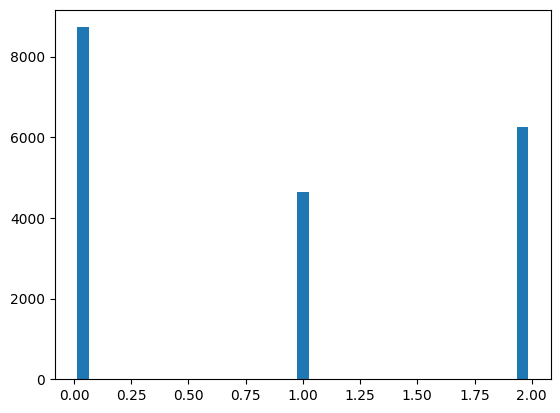

In [4]:
num_bins = 25
hist, bins = np.histogram(x['player_action'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
print('total data:', len(x['player_action']))

In [5]:
y = x['player_action']
x.drop(['player_action'],axis=1,inplace=True)
y

0        0
1        0
2        0
3        0
4        0
        ..
19622    0
19623    0
19624    0
19625    0
19626    0
Name: player_action, Length: 19627, dtype: int64

In [6]:
y_cat = to_categorical(y)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(x_scaled, y_cat, test_size=0.2, random_state=1)

In [8]:
def game_model():
    model = Sequential()
    model.add(Dense(128, activation='selu', input_shape=(5,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    optimizer = Adam(learning_rate=1e-3)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
model = game_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 44227 (172.76 KB)
Trainable params: 44227 

In [10]:
hist = model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1, shuffle = 1, validation_data=(X_valid, y_valid)) # SGD

Epoch 1/100
246/246 [==============================] - 1s 2ms/step - loss: 0.8760 - accuracy: 0.5875 - val_loss: 0.8258 - val_accuracy: 0.6263
Epoch 2/100
246/246 [==============================] - 0s 2ms/step - loss: 0.8254 - accuracy: 0.6203 - val_loss: 0.7938 - val_accuracy: 0.6411
Epoch 3/100
246/246 [==============================] - 0s 2ms/step - loss: 0.8050 - accuracy: 0.6310 - val_loss: 0.7916 - val_accuracy: 0.6373
Epoch 4/100
246/246 [==============================] - 0s 2ms/step - loss: 0.7832 - accuracy: 0.6458 - val_loss: 0.7616 - val_accuracy: 0.6495
Epoch 5/100
246/246 [==============================] - 0s 2ms/step - loss: 0.7586 - accuracy: 0.6561 - val_loss: 0.7486 - val_accuracy: 0.6556
Epoch 6/100
246/246 [==============================] - 0s 2ms/step - loss: 0.7376 - accuracy: 0.6643 - val_loss: 0.7236 - val_accuracy: 0.6752
Epoch 7/100
246/246 [==============================] - 0s 2ms/step - loss: 0.7167 - accuracy: 0.6717 - val_loss: 0.6980 - val_accuracy: 0.6893

Text(0.5, 0, 'Epoch')

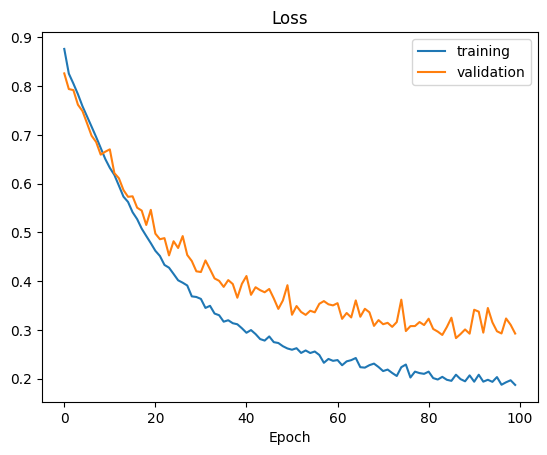

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

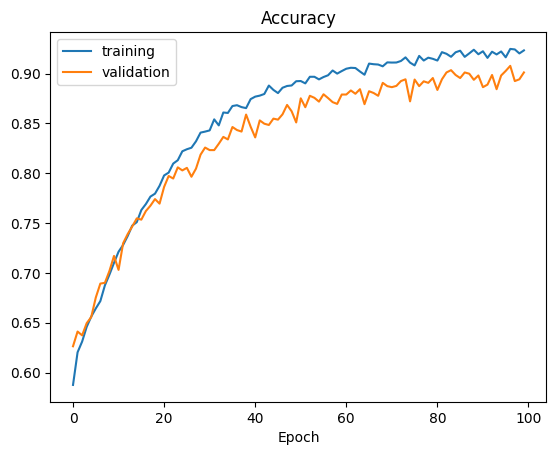

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [14]:
model.save('my_model.keras')